<a href="https://colab.research.google.com/github/davimoreira061/Exercicio_05_fundamentos/blob/master/Atividade_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Código Base**

In [7]:
%pip install scikit-learn

In [8]:
import pandas as pd

In [9]:
%pip install pandas

In [10]:
churn_df = pd.read_csv("telecom_churn_clean.csv")

In [11]:
from sklearn.neighbors import KNeighborsClassifier
X = churn_df[["total_day_charge", "total_eve_charge"]].values
y = churn_df["churn"].values
print(X.shape, y.shape)

(3333, 2) (3333,)


In [12]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=15)

In [13]:
%pip install numpy

In [14]:
import numpy as np

In [15]:
X_new = np.array([[56.8, 17.5],  # primeira observação
                  [24.4, 24.1],  # segunda  observação
                  [50.1, 10.9]]) # terceira observação
print(X_new.shape)

(3, 2)


In [16]:
predictions = knn.predict(X_new)
print('Predictions: {}'.format(predictions))

Predictions: [1 0 0]


In [17]:
from sklearn.neighbors import KNeighborsClassifier

k-Nearest Neighbors: Ajuste do Modelo

In [18]:
y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)
# Fit the classifier to the data
knn.fit(X, y)


KNeighborsClassifier(n_neighbors=6)

k-Nearest Neighbors: Predição

In [19]:
import numpy as np

# Novas observações
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])

# Predict the labels for the X_new
y_pred = knn.predict(X_new)

# Print the predictions
print("Predictions: {}".format(y_pred))


Predictions: [0 1 0]


Divisão Treino/Teste + Cálculo da Acurácia

In [20]:
# Import the module
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create KNN classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))


0.8545727136431784


Overfitting e Underfitting


In [21]:
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
    # Set up a KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=neighbor)

    # Fit the model
    knn.fit(X_train, y_train)

    # Compute accuracy
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

print(neighbors, '\n', train_accuracies, '\n', test_accuracies)


[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {np.int64(1): 1.0, np.int64(2): 0.8885971492873218, np.int64(3): 0.8994748687171793, np.int64(4): 0.8750937734433608, np.int64(5): 0.878469617404351, np.int64(6): 0.8660915228807202, np.int64(7): 0.8705926481620405, np.int64(8): 0.8615903975993998, np.int64(9): 0.86384096024006, np.int64(10): 0.858589647411853, np.int64(11): 0.8604651162790697, np.int64(12): 0.8574643660915229} 
 {np.int64(1): 0.7856071964017991, np.int64(2): 0.8470764617691154, np.int64(3): 0.8320839580209896, np.int64(4): 0.856071964017991, np.int64(5): 0.8545727136431784, np.int64(6): 0.8590704647676162, np.int64(7): 0.8605697151424287, np.int64(8): 0.8620689655172413, np.int64(9): 0.863568215892054, np.int64(10): 0.8605697151424287, np.int64(11): 0.8605697151424287, np.int64(12): 0.8605697151424287}


gráfico

In [22]:

import matplotlib.pyplot as plt

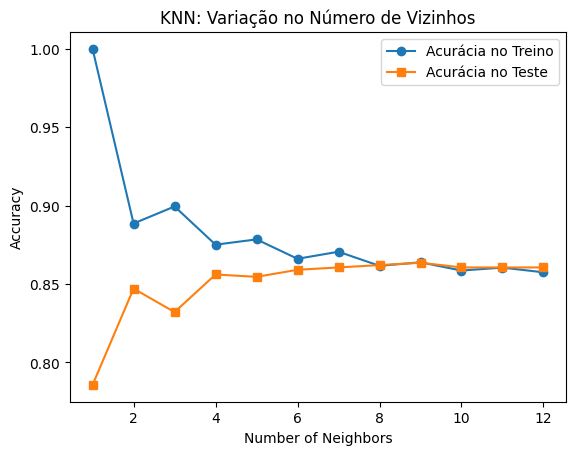

In [23]:
# Add a title
plt.title("KNN: Variação no Número de Vizinhos")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Acurácia no Treino", marker='o')

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Acurácia no Teste", marker='s')

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()
